In [1]:
import sys
sys.path.append('../1_format/')

In [61]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
import seaborn
from matplotlib.pyplot import figure
seaborn.set()

from sirene import search_unite_legale, search_etablissement, list_etablissements

In [3]:
pd.set_option('display.max_columns', None)

### Get siren identification in each tables

In [4]:
# search for dedicated siren list in each table
StockUniteLegale = pd.read_csv('../0_data/base_sirene/StockUniteLegale_utf8.csv', usecols=['siren'])
StockUniteLegaleHistorique = pd.read_csv('../0_data/base_sirene/StockUniteLegaleHistorique_utf8.csv', usecols=['siren'])
StockEtablissement = pd.read_csv('../0_data/base_sirene/StockEtablissement_utf8.csv', usecols=['siren'])
StockEtablissementHistorique = pd.read_csv('../0_data/base_sirene/StockEtablissementHistorique_utf8.csv', usecols=['siren'])

StockEtablissementLiensSuccession = pd.read_csv('../0_data/base_sirene/StockEtablissementLiensSuccession_utf8.csv')

### Exemple Vinci Immo

In [28]:
siren = 722026226  # siren de VINCI IMMOBILIER

In [29]:
%%time
info_siren_vinci, info_siren_historique_vinci = search_unite_legale(siren, StockUniteLegale, StockUniteLegaleHistorique)

CPU times: total: 41.4 s
Wall time: 42.5 s


In [30]:
info_siren_vinci

,siren,dateCreationUniteLegale,nombrePeriodesUniteLegale,dateDebut,etatAdministratifUniteLegale,denominationUniteLegale,nicSiegeUniteLegale
0,722026226,1900-01-01,13,2022-06-30,A,VINCI IMMOBILIER,59


In [31]:
info_siren_historique_vinci

,siren,dateFin,dateDebut,etatAdministratifUniteLegale,changementEtatAdministratifUniteLegale,denominationUniteLegale,changementDenominationUniteLegale,changementCategorieJuridiqueUniteLegale,changementActivitePrincipaleUniteLegale,nicSiegeUniteLegale,changementNicSiegeUniteLegale
0,722026226,NaN,2022-06-30,A,False,VINCI IMMOBILIER,False,False,False,59.0,True
1,722026226,2022-06-29,2015-10-16,A,False,VINCI IMMOBILIER,False,False,False,42.0,True
2,722026226,2015-10-15,2008-01-01,A,False,VINCI IMMOBILIER,False,False,True,34.0,False
3,722026226,2007-12-31,2006-12-01,A,False,VINCI IMMOBILIER,False,False,False,34.0,True
4,722026226,2006-11-30,2005-12-31,A,False,VINCI IMMOBILIER,False,False,True,26.0,False
5,722026226,2005-12-30,2005-09-14,A,False,VINCI IMMOBILIER,False,False,False,26.0,False
6,722026226,2005-09-13,2005-05-31,A,False,VINCI IMMOBILIER,False,False,False,26.0,True
7,722026226,2005-05-30,2005-01-01,A,False,VINCI IMMOBILIER,True,False,False,NaN,False
8,722026226,2004-12-31,2003-12-25,A,False,ELIGE PARTICIPATIONS,False,False,True,NaN,False
9,722026226,2003-12-24,2002-12-25,A,False,ELIGE PARTICIPATIONS,False,True,False,NaN,False


In [32]:
%%time
info_siret_vinci, info_siret_historique_vinci, info_succession = search_etablissement(siren, 
                                                                                      StockEtablissement, 
                                                                                      StockEtablissementHistorique,
                                                                                      StockEtablissementLiensSuccession)

CPU times: total: 48.4 s
Wall time: 48.9 s


In [33]:
info_siret_vinci

,siren,nic,siret,dateCreationEtablissement,etablissementSiege,nombrePeriodesEtablissement,numeroVoieEtablissement,typeVoieEtablissement,libelleVoieEtablissement,codePostalEtablissement,libelleCommuneEtablissement,codeCommuneEtablissement,dateDebut,etatAdministratifEtablissement
0,722026226,18,72202622600018,1900-01-01,False,4,61,AV,JULES QUENTIN,92000,NANTERRE,92050,2005-05-31,F
1,722026226,26,72202622600026,2005-05-31,False,3,66,RTE,DE LA REINE,92100,BOULOGNE-BILLANCOURT,92012,2006-12-01,F
2,722026226,34,72202622600034,2006-12-01,False,3,8,RUE,HEYRAULT,92100,BOULOGNE-BILLANCOURT,92012,2015-10-16,F
3,722026226,42,72202622600042,2015-10-16,False,2,59,RUE,YVES KERMEN,92100,BOULOGNE-BILLANCOURT,92012,2022-06-30,F
4,722026226,59,72202622600059,2022-06-30,True,1,2313,BD,DE LA DEFENSE,92000,NANTERRE,92050,2022-06-30,A


In [34]:
info_siret_historique_vinci

,siren,nic,siret,dateFin,dateDebut,etatAdministratifEtablissement,changementEtatAdministratifEtablissement,changementActivitePrincipaleEtablissement
0,722026226,18,72202622600018,NaN,2005-05-31,F,True,False
1,722026226,18,72202622600018,2005-05-30,2003-12-25,A,False,True
2,722026226,18,72202622600018,2003-12-24,1999-12-25,A,False,False
3,722026226,18,72202622600018,1999-12-24,1900-01-01,A,False,False
4,722026226,26,72202622600026,NaN,2006-12-01,F,True,False
5,722026226,26,72202622600026,2006-11-30,2005-12-31,A,False,True
6,722026226,26,72202622600026,2005-12-30,2005-05-31,A,False,False
7,722026226,34,72202622600034,NaN,2015-10-16,F,True,False
8,722026226,34,72202622600034,2015-10-15,2008-01-01,A,False,True
9,722026226,34,72202622600034,2007-12-31,2006-12-01,A,False,False


In [35]:
info_succession

,siretEtablissementPredecesseur,siretEtablissementSuccesseur,dateLienSuccession,transfertSiege,continuiteEconomique,dateDernierTraitementLienSuccession
4661846,72202622600018,72202622600026,2005-05-31,False,True,2005-11-26T12:16:42
4666539,72202622600026,72202622600034,2006-12-01,False,True,2006-12-27T13:07:24
4693146,72202622600034,72202622600042,2015-10-16,False,True,2015-11-13T08:09:14
4732523,72202622600042,72202622600059,2022-06-30,False,True,2022-07-04T10:39:34


In [36]:
etablissements_actifs, etablissements_fermes = list_etablissements(info_siret_vinci, info_siret_historique_vinci)

In [37]:
etablissements_fermes

,siren,siret,etablissementSiege,address,dateDebut,dateFin,time spent (in y)
3,722026226,72202622600042,False,59 RUE YVES KERMEN BOULOGNE-BILLANCOURT,2015-10-16,2022-06-30,6.71
2,722026226,72202622600034,False,8 RUE HEYRAULT BOULOGNE-BILLANCOURT,2006-12-01,2015-10-16,8.88
1,722026226,72202622600026,False,66 RTE DE LA REINE BOULOGNE-BILLANCOURT,2005-05-31,2006-12-01,1.50
0,722026226,72202622600018,False,61 AV JULES QUENTIN NANTERRE,NaT,2005-05-31,NaN


In [38]:
etablissements_actifs

,siren,siret,etablissementSiege,address,dateDebut,time spent (in y)
4,722026226,72202622600059,True,2313 BD DE LA DEFENSE NANTERRE,2022-06-30,0.88


### Exemple Celio Immo

In [16]:
siren = 313334856  # siren de CELIO

In [17]:
info_siren_celio, info_siren_historique_celio = search_unite_legale(siren, StockUniteLegale, StockUniteLegaleHistorique)
info_siret_celio, info_siret_historique_celio, info_succession = search_etablissement(siren, 
                                                                                      StockEtablissement, 
                                                                                      StockEtablissementHistorique,
                                                                                      StockEtablissementLiensSuccession)

In [18]:
info_siren_celio

,siren,dateCreationUniteLegale,nombrePeriodesUniteLegale,dateDebut,etatAdministratifUniteLegale,denominationUniteLegale,nicSiegeUniteLegale
0,313334856,1978-06-01,8,2022-01-31,A,CELIO FRANCE,1684


In [19]:
info_siren_historique_celio

,siren,dateFin,dateDebut,etatAdministratifUniteLegale,changementEtatAdministratifUniteLegale,denominationUniteLegale,changementDenominationUniteLegale,changementCategorieJuridiqueUniteLegale,changementActivitePrincipaleUniteLegale,nicSiegeUniteLegale,changementNicSiegeUniteLegale
0,313334856,1995-12-24,1978-06-01,A,False,MARC LAURENT,False,False,False,1684,False
1,313334856,2003-12-24,1995-12-25,A,False,MARC LAURENT,False,False,False,1684,False
2,313334856,2007-04-02,2003-12-25,A,False,MARC LAURENT,False,True,True,1684,False
3,313334856,2007-12-31,2007-04-03,A,False,CELIO FRANCE,True,True,False,1684,False
4,313334856,2011-04-30,2008-01-01,A,False,CELIO FRANCE,False,False,True,1684,False
5,313334856,2016-06-30,2011-05-01,A,False,CELIO FRANCE,False,False,False,1684,False
6,313334856,2022-01-30,2016-07-01,A,False,CELIO FRANCE,False,False,False,1684,False
7,313334856,NaN,2022-01-31,A,False,CELIO FRANCE,False,False,False,1684,False


In [20]:
info_siret_celio

,siren,nic,siret,dateCreationEtablissement,etablissementSiege,nombrePeriodesEtablissement,numeroVoieEtablissement,typeVoieEtablissement,libelleVoieEtablissement,codePostalEtablissement,libelleCommuneEtablissement,codeCommuneEtablissement,dateDebut,etatAdministratifEtablissement
0,313334856,17,31333485600017,1900-01-01,False,4,96.0,RUE,SAINT LAZARE,75009,PARIS 9,75109,1997-11-15,F
1,313334856,25,31333485600025,1980-11-01,False,5,29.0,BD,SAINT MICHEL,75005,PARIS 5,75105,2015-06-30,F
2,313334856,58,31333485600058,1980-11-01,False,4,252.0,RUE,SAINT DENIS,75002,PARIS 2,75102,2008-01-01,A
3,313334856,132,31333485600132,1985-03-01,False,6,60.0,RUE,DE BOULAINVILLIERS,75016,PARIS 16,75116,2019-07-31,F
4,313334856,157,31333485600157,1986-05-01,False,5,7.0,PAS,DU SAULGER,93200,SAINT-DENIS,93066,2011-12-31,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,313334856,6097,31333485606097,2022-03-01,False,1,NaN,NaN,SHOPPING PROMENADE,67116,REICHSTETT,67389,2022-03-01,A
593,313334856,6105,31333485606105,2022-10-06,False,1,NaN,AV,DU TILLEUL,90160,BESSONCOURT,90012,2022-10-06,A
594,313334856,6113,31333485606113,2023-04-01,False,1,200.0,RUE,PAUL LAURENT,30900,NIMES,30189,2023-04-01,A
595,313334856,6121,31333485606121,2023-05-15,False,1,NaN,RUE,DE L AVENIR,10410,SAINT-PARRES-AUX-TERTRES,10357,2023-05-15,A


In [21]:
info_siret_historique_celio

,siren,nic,siret,dateFin,dateDebut,etatAdministratifEtablissement,changementEtatAdministratifEtablissement,changementActivitePrincipaleEtablissement
0,313334856,17,31333485600017,NaN,1997-11-15,F,True,False
1,313334856,17,31333485600017,1997-11-14,1996-12-31,A,False,False
2,313334856,17,31333485600017,1996-12-30,1990-12-25,A,False,True
3,313334856,17,31333485600017,1990-12-24,1900-01-01,A,False,False
4,313334856,25,31333485600025,NaN,2015-06-30,F,True,False
...,...,...,...,...,...,...,...,...
1853,313334856,6097,31333485606097,NaN,2022-03-01,A,False,False
1854,313334856,6105,31333485606105,NaN,2022-10-06,A,False,False
1855,313334856,6113,31333485606113,NaN,2023-04-01,A,False,False
1856,313334856,6121,31333485606121,NaN,2023-05-15,A,False,False


In [22]:
info_succession

,siretEtablissementPredecesseur,siretEtablissementSuccesseur,dateLienSuccession,transfertSiege,continuiteEconomique,dateDernierTraitementLienSuccession
7467,77814935100042,31333485601197,1993-10-01,False,False,2005-11-26T12:17:21
1295335,31353691400010,31333485601445,1994-02-01,False,False,2005-11-26T11:56:08
1806130,97280031200019,31333485603193,2006-06-01,False,False,2006-08-04T09:22:06
2425123,31039239400055,31333485605834,2014-01-29,False,False,2014-02-18T11:03:52
2425128,31039239400048,31333485605875,2014-01-29,False,True,2014-02-25T10:54:23
...,...,...,...,...,...,...
7591306,30028633300228,31333485605818,2014-01-29,False,True,2014-02-18T04:46:38
8080059,33378672100014,31333485601809,1996-01-01,False,True,2005-11-26T11:59:55
8340752,31333485603136,31333485606113,2023-04-01,False,False,2023-04-21T16:03:50
8350334,31039239400055,31333485606139,2022-05-13,False,False,2023-04-28T17:12:12


In [64]:
etablissements_actifs, etablissements_fermes = list_etablissements(info_siret_celio, info_siret_historique_celio)

In [65]:
etablissements_fermes['time spent (in y)'] = etablissements_fermes.dropna(subset='time spent (in y)')['time spent (in y)'].astype('int')

In [66]:
etablissements_actifs['time spent (in y)'] = etablissements_actifs.dropna(subset='time spent (in y)')['time spent (in y)'].astype('int')

<Axes: title={'center': 'Distribution de la durée de vie des établissement fermés de CELIO (source : base historique SIREN'}, xlabel='time spent (in y)'>

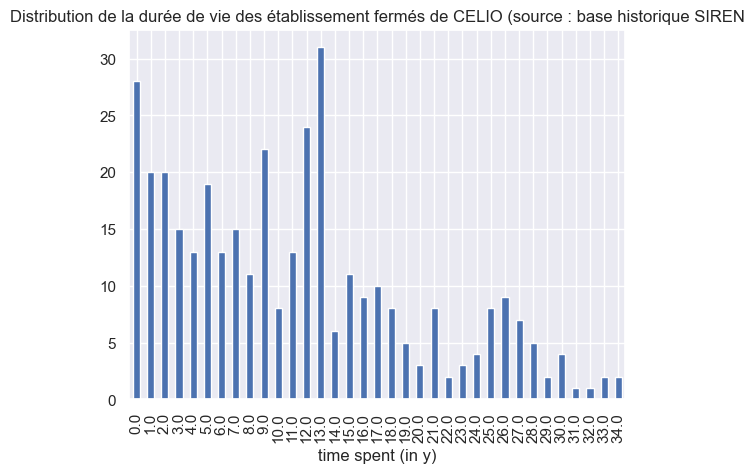

In [69]:
etablissements_fermes.groupby('time spent (in y)').count().siren.plot(kind = 'bar', title = 'Distribution de la durée de vie des établissement fermés de CELIO (source : base historique SIREN')

<Axes: title={'center': 'Distribution de la durée de vie des établissement ouverts de CELIO (source : base historique SIREN'}, xlabel='time spent (in y)'>

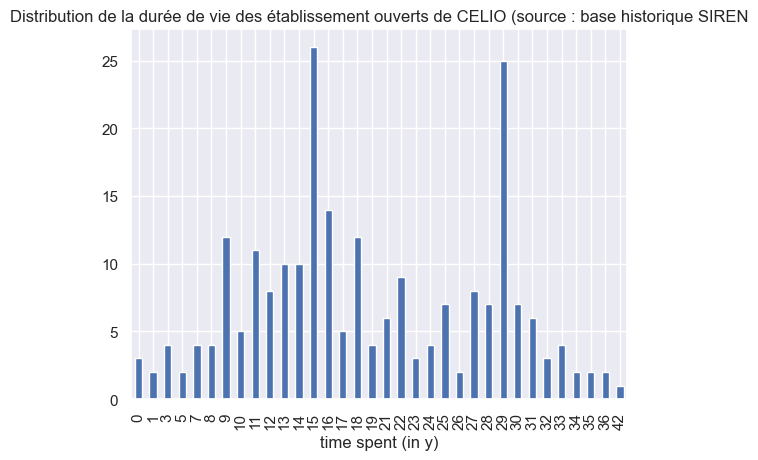

In [70]:
etablissements_actifs.groupby('time spent (in y)').count().siren.plot(kind = 'bar', title = 'Distribution de la durée de vie des établissement ouverts de CELIO (source : base historique SIREN')

### Evolution siege social

In [71]:
info_siren_historique_vinci.drop_duplicates('nicSiegeUniteLegale', keep='first')

,siren,dateFin,dateDebut,etatAdministratifUniteLegale,changementEtatAdministratifUniteLegale,denominationUniteLegale,changementDenominationUniteLegale,changementCategorieJuridiqueUniteLegale,changementActivitePrincipaleUniteLegale,nicSiegeUniteLegale,changementNicSiegeUniteLegale
0,722026226,NaN,2022-06-30,A,False,VINCI IMMOBILIER,False,False,False,59.0,True
1,722026226,2022-06-29,2015-10-16,A,False,VINCI IMMOBILIER,False,False,False,42.0,True
2,722026226,2015-10-15,2008-01-01,A,False,VINCI IMMOBILIER,False,False,True,34.0,False
4,722026226,2006-11-30,2005-12-31,A,False,VINCI IMMOBILIER,False,False,True,26.0,False
7,722026226,2005-05-30,2005-01-01,A,False,VINCI IMMOBILIER,True,False,False,NaN,False


In [72]:
info_succession

,siretEtablissementPredecesseur,siretEtablissementSuccesseur,dateLienSuccession,transfertSiege,continuiteEconomique,dateDernierTraitementLienSuccession
4661846,72202622600018,72202622600026,2005-05-31,False,True,2005-11-26T12:16:42
4666539,72202622600026,72202622600034,2006-12-01,False,True,2006-12-27T13:07:24
4693146,72202622600034,72202622600042,2015-10-16,False,True,2015-11-13T08:09:14
4732523,72202622600042,72202622600059,2022-06-30,False,True,2022-07-04T10:39:34
